#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Load and take a look at Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df = df.drop(["id"] , axis = True)
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date.month)

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


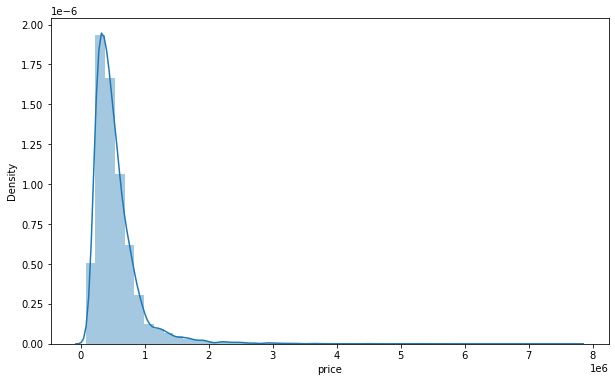

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df['price'])

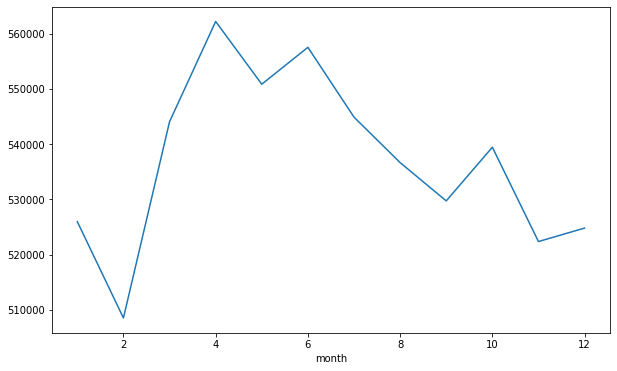

In [ ]:
plt.figure(figsize = (10,6))
df.groupby("month").mean()["price"].plot()

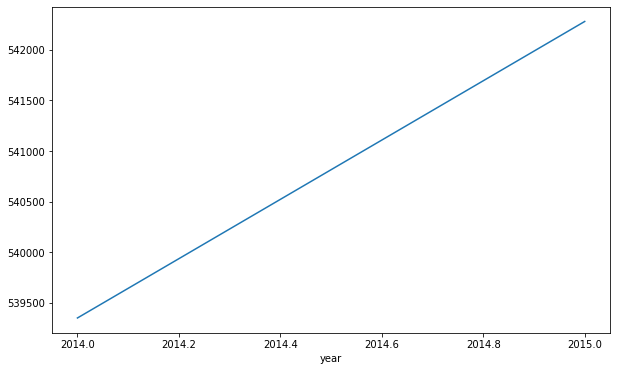

In [ ]:
plt.figure(figsize = (10,6))
df.groupby("year").mean()["price"].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


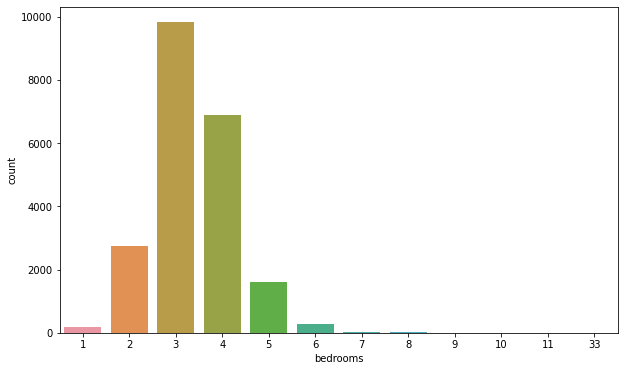

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df["bedrooms"])

In [ ]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
year             0.003727
month           -0.009928
zipcode         -0.053402
Name: price, dtype: float64

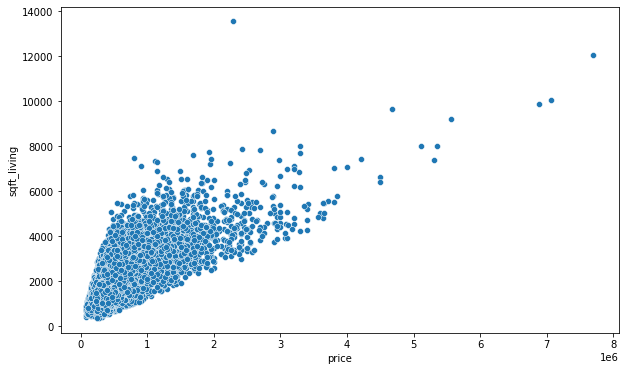

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot( x = df["price"] , y = df["sqft_living"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


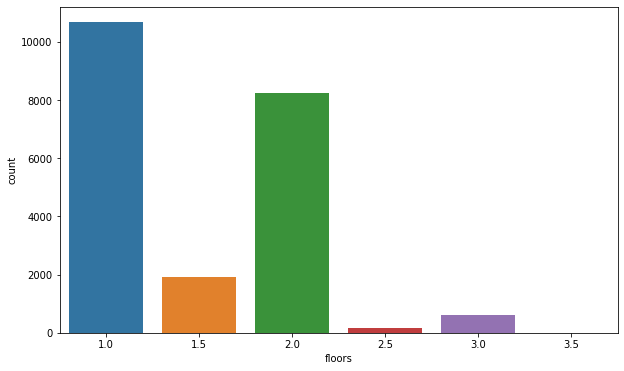

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df["floors"])

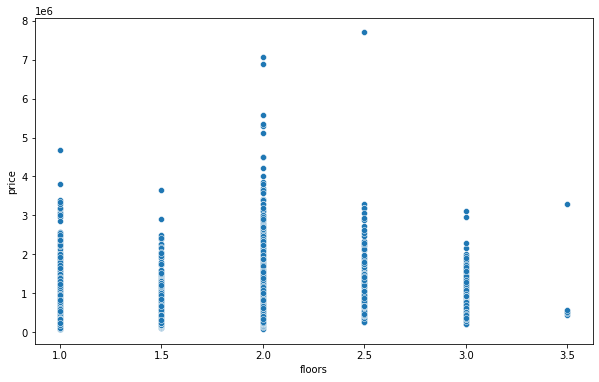

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot( x = df["floors"] , y = df["price"])

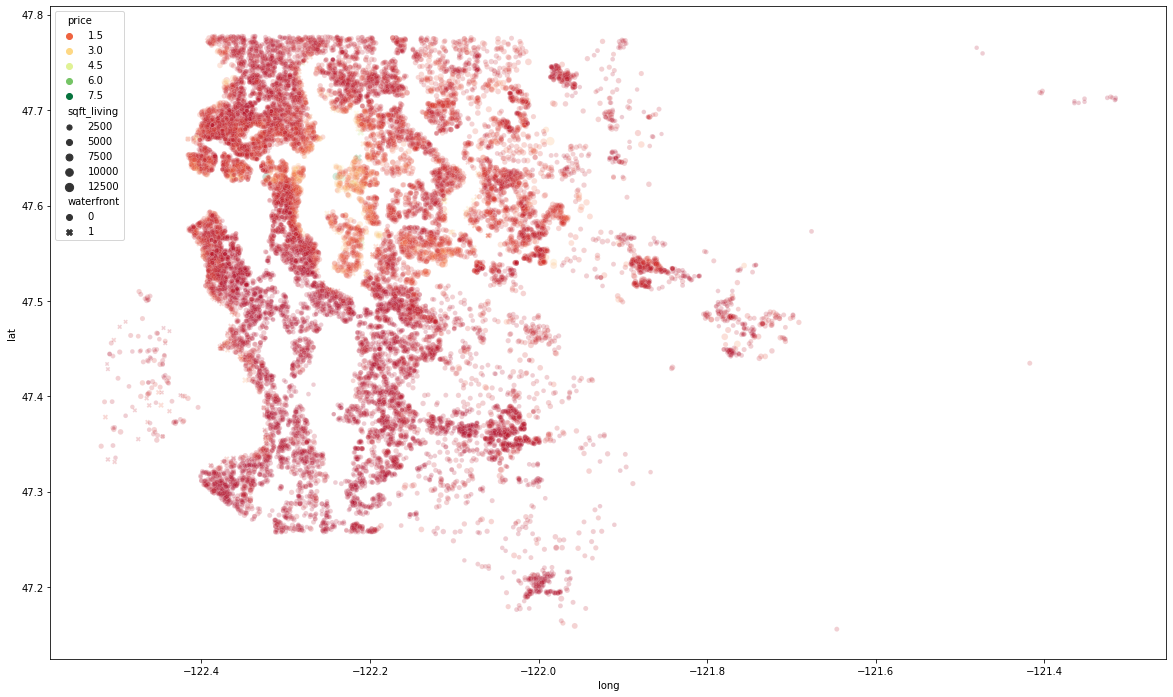

In [ ]:
plt.figure( figsize = (20,12))
sns.scatterplot( x ="long", y ="lat" , hue = "price",style = "waterfront" , size = "sqft_living",alpha = 0.2, palette="RdYlGn", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


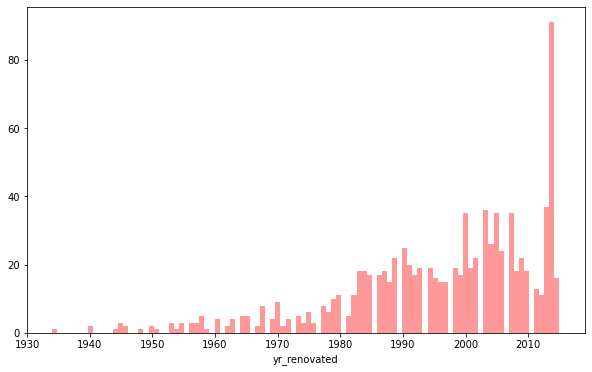

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df[df["yr_renovated"] != 0]["yr_renovated"], kde=False, color='red', bins=100)

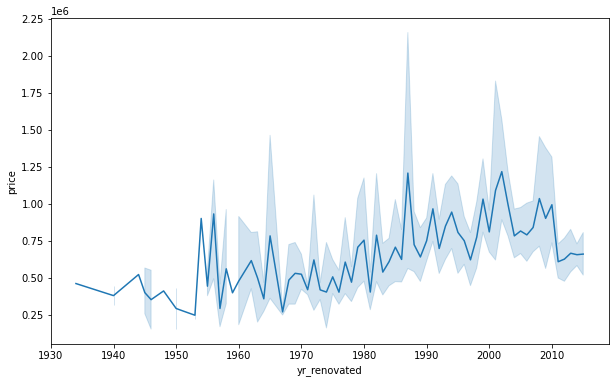

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x = df[df["yr_renovated"] != 0]["yr_renovated"] , y = df['price'])

## Scaling and Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x = df.drop(['price',"zipcode" ,'date'], axis = 1).values
y = df["price"]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 42)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(17277, 19)

In [ ]:
model = Sequential()

model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))

model.add(Dense(1))
model.compile( optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit( x = x_train , y = y_train,  batch_size=128, epochs=400, verbose='auto', validation_data=(x_test , y_test))

Epoch 1/400
135/135 [==============================] - 2s 4ms/step - loss: 429325025280.0000 - val_loss: 416589905920.0000
Epoch 2/400
135/135 [==============================] - 0s 3ms/step - loss: 425274572800.0000 - val_loss: 403098206208.0000
Epoch 3/400
135/135 [==============================] - 0s 3ms/step - loss: 375993106432.0000 - val_loss: 300271239168.0000
Epoch 4/400
135/135 [==============================] - 0s 3ms/step - loss: 213749170176.0000 - val_loss: 121084100608.0000
Epoch 5/400
135/135 [==============================] - 0s 3ms/step - loss: 105905569792.0000 - val_loss: 95503007744.0000
Epoch 6/400
135/135 [==============================] - 0s 3ms/step - loss: 99047882752.0000 - val_loss: 93583400960.0000
Epoch 7/400
135/135 [==============================] - 0s 3ms/step - loss: 96986161152.0000 - val_loss: 91614756864.0000
Epoch 8/400
135/135 [==============================] - 0s 3ms/step - loss: 94928257024.0000 - val_loss: 89641656320.0000
Epoch 9/400
135/135 [==

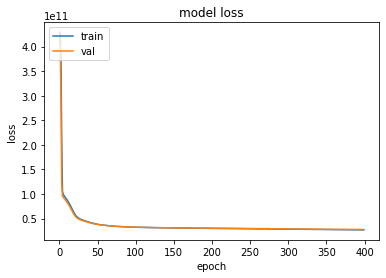

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
predictions = model.predict(x_test)
mean_absolute_error(y_test,predictions)


103148.02481915509

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))


167007.89782638312

In [ ]:
explained_variance_score(y_test,predictions)

0.7858280124303666